In [1]:
# Importing all required packages
import numpy as np
import pandas as pd
# Importing Libraries
#conda install -c conda-forge kmodes
from kmodes.kmodes import KModes
# Data viz lib
#import matplotlib.pyplot as plt
import seaborn as sns
#%matplotlib inline
#from matplotlib.pyplot import xticks
from sklearn import preprocessing

# importing matplotlib module  
from matplotlib import pyplot as plt  

From https://www.kaggle.com/ashydv/bank-customer-clustering-k-modes-clustering

In [2]:
df_raw = pd.read_csv('./bankmarketing.csv')

In [3]:
df=df_raw[['age','job', 'marital', 'education', 'default', 'housing', 'loan','contact','month','day_of_week','poutcome']]

In [4]:
df_copy=df.copy() # copies the data frame to have the original as reference as we are goin to do some processing

Do some data checks (here we would have to do a lot more in real life)

In [5]:
df.isnull().sum()*100/df.shape[0]

age            0.0
job            0.0
marital        0.0
education      0.0
default        0.0
housing        0.0
loan           0.0
contact        0.0
month          0.0
day_of_week    0.0
poutcome       0.0
dtype: float64

Pandas cut() will create bins providing the ranges and level

In [6]:
df['age_bin'] = pd.cut(df['age'], [0, 20, 30, 40, 50, 60, 70, 80, 90, 100], labels=['0-20', '20-30', '30-40', '40-50','50-60','60-70','70-80', '80-90','90-100'])
df  = df.drop('age',axis = 1)

In [7]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df = df.apply(le.fit_transform)
df.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,age_bin
0,3,1,0,0,0,0,1,6,1,1,4
1,7,1,3,1,0,0,1,6,1,1,4
2,7,1,3,0,2,0,1,6,1,1,2
3,0,1,1,0,0,0,1,6,1,1,2
4,7,1,3,0,0,2,1,6,1,1,4


In [8]:
km_cao = KModes(n_clusters=2, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao = km_cao.fit_predict(df) # this is an array of predicted clusters
fitClusters_cao

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 5322, cost: 192203.0
Run 1, iteration: 2/100, moves: 1160, cost: 192203.0


array([1, 1, 0, ..., 0, 1, 0], dtype=uint16)

In [9]:
clusterCentroidsDf = pd.DataFrame(km_cao.cluster_centroids_)
clusterCentroidsDf.columns = df.columns
# Mode of the clusters
clusterCentroidsDf

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,age_bin
0,0,1,6,0,2,0,0,6,2,1,2
1,1,1,3,0,0,0,1,6,0,1,3


In [10]:
km_huang = KModes(n_clusters=2, init = "Huang", n_init = 1, verbose=1)
fitClusters_huang = km_huang.fit_predict(df)
# Predicted clusters
fitClusters_huang

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 11222, cost: 196526.0
Run 1, iteration: 2/100, moves: 404, cost: 196526.0


array([0, 0, 0, ..., 0, 0, 0], dtype=uint16)

In [36]:
cost = []
for num_clusters in list(range(1,5)):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1, verbose=1)
    kmode.fit_predict(df)
    cost.append(kmode.cost_)


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 216952.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 5322, cost: 192203.0
Run 1, iteration: 2/100, moves: 1160, cost: 192203.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 4993, cost: 185138.0
Run 1, iteration: 2/100, moves: 1368, cost: 185138.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 6186, cost: 179774.0
Run 1, iteration: 2/100, moves: 1395, cost: 179774.0


In [11]:
y = np.array([i for i in range(1,5,1)])
plt.plot(y,cost)

NameError: name 'cost' is not defined

In [ ]:
#chosen k=2
km_cao = KModes(n_clusters=2, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao = km_cao.fit_predict(df)

In [ ]:
fitClusters_cao

In [19]:
df_out = df_copy.reset_index()
clustersDf = pd.DataFrame(fitClusters_cao)
clustersDf.columns = ['cluster_predicted']
combinedDf = pd.concat([df_out, clustersDf], axis = 1).reset_index()
combinedDf = combinedDf.drop(['index', 'level_0'], axis = 1)
combinedDf.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,cluster_predicted
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,1
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,1
2,37,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,1


In [20]:
#cluster identification
cluster_0 = combinedDf[combinedDf['cluster_predicted'] == 0]
cluster_1 = combinedDf[combinedDf['cluster_predicted'] == 1]

In [21]:
cluster_0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28293 entries, 2 to 41187
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                28293 non-null  int64 
 1   job                28293 non-null  object
 2   marital            28293 non-null  object
 3   education          28293 non-null  object
 4   default            28293 non-null  object
 5   housing            28293 non-null  object
 6   loan               28293 non-null  object
 7   contact            28293 non-null  object
 8   month              28293 non-null  object
 9   day_of_week        28293 non-null  object
 10  poutcome           28293 non-null  object
 11  cluster_predicted  28293 non-null  uint16
dtypes: int64(1), object(10), uint16(1)
memory usage: 2.6+ MB


In [22]:
cluster_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12895 entries, 0 to 41186
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                12895 non-null  int64 
 1   job                12895 non-null  object
 2   marital            12895 non-null  object
 3   education          12895 non-null  object
 4   default            12895 non-null  object
 5   housing            12895 non-null  object
 6   loan               12895 non-null  object
 7   contact            12895 non-null  object
 8   month              12895 non-null  object
 9   day_of_week        12895 non-null  object
 10  poutcome           12895 non-null  object
 11  cluster_predicted  12895 non-null  uint16
dtypes: int64(1), object(10), uint16(1)
memory usage: 1.2+ MB


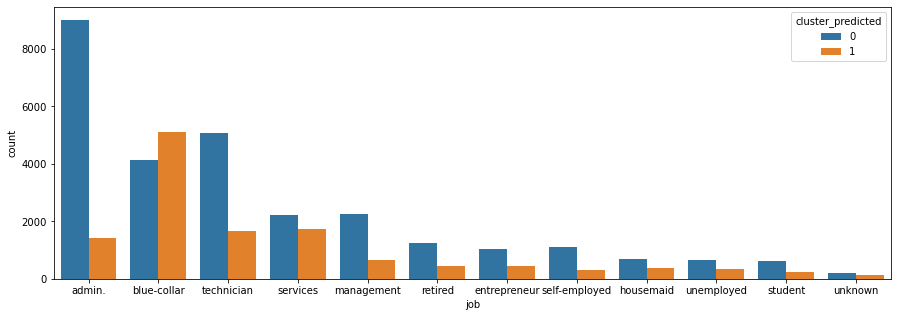

In [23]:
plt.subplots(figsize = (15,5))
sns.countplot(x=combinedDf['job'],order=combinedDf['job'].value_counts().index,hue=combinedDf['cluster_predicted'])
plt.show()

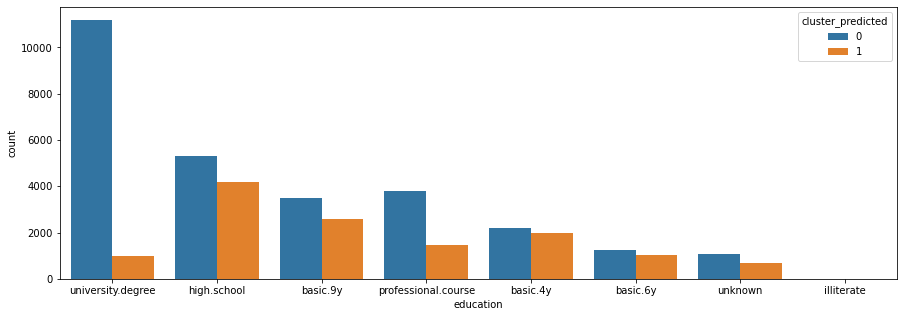

In [25]:
plt.subplots(figsize = (15,5))
sns.countplot(x=combinedDf['education'],order=combinedDf['education'].value_counts().index,hue=combinedDf['cluster_predicted'])
plt.show()